# El perceptrón de Rosenblatt
Un **perceptrón** es un tipo de neurona artificial. Este suma las entradas para computar un valor intermedio $z$, el cual alimenta a una **función de activación**. El perceptrón usa la **función signo** como función de activación, pero otras redes neuronales artificiales usan otras funciones.

De esta forma, el perceptrón tiene como salida $-1$ si la suma ponderada es menor a cero, y en caso contrario, tiene como salida $1$. Escrito como una ecuación, se tiene:
$$ y = f(z) ,\text{ donde} \\
 z = \sum_{i=0}^{n} w_i x_i \\
 f = \left\{\begin{matrix}
 -1, \; z <0 & \\ 
 1, \; z \ge 0& 
\end{matrix}\right. \\
x_0 = 1 \text{(bias)}
$$

## Implementación del perceptrón con Python

In [8]:
# El primer elemento en el vector x debe ser 1.
# La longitud de w y x debe ser n+1 para una neurona con n entradas
def compute_output(w,x):
    z = 0.0
    for i in range(len(w)):
        z += x[i] * w[i] # suma ponderada de las entradas

    if z < 0: # función de activación
        return -1
    else:
        return 1

### Ejemplo con un perceptrón de dos entradas
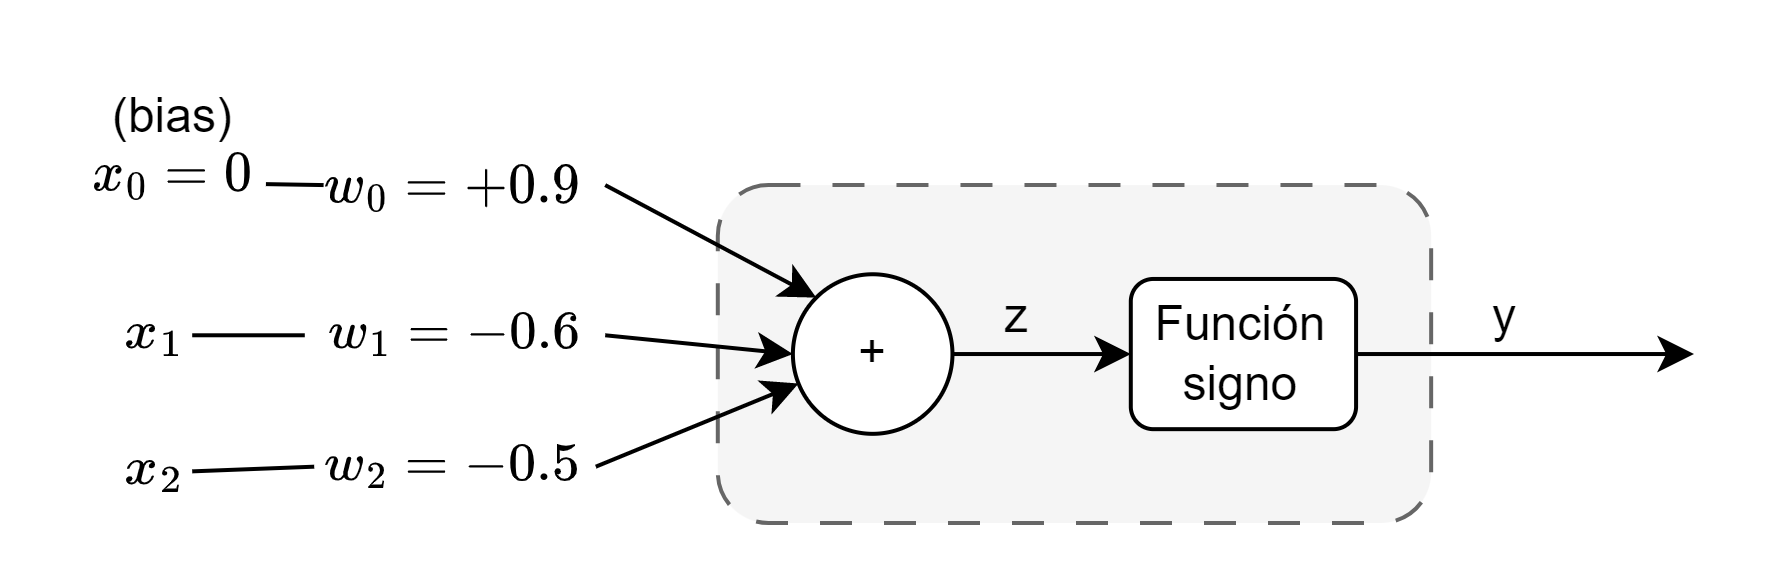
Para conocer el output de las diferentes combinaciones de entradas, utilizo la función definida anteriormente

In [16]:
# False, False --> True
compute_output([0.9, -0.6, -0.5], [1.0, -1.0, -1.0])

1

In [15]:
# False, True --> True
compute_output([0.9, -0.6, -0.5], [1.0, -1.0, 1.0])

1

In [14]:
# True, False --> True
compute_output([0.9, -0.6, -0.5], [1.0, 1.0, -1.0])

1

In [13]:
# True, True --> False
compute_output([0.9, -0.6, -0.5], [1.0, 1.0, 1.0])

-1

## Algoritmo de aprendizaje del perceptrón
El algoritmo de aprendizaje del perceptrón es lo que se llama *algoritmo de entrenamiento supervizado*. La palabra supervizado implica que el modelo que se está entrenando se presenta con los datos de entrada y con los resultados deseados *(ground truth)*. 

El algoritmo funciona de la siguiente manera:
1. Se inicializan los pesos aleatoriamente
2. Se selecciona un par entrada/salida aleatoriamente
3. Se presentan los valores $x_1, x_2, ..., x_n$ al perceptrón para obtener la salida $y$
4. Si la salida $y$ es diferente a la salida esperada para ese par entrada/salida, ajustar los pesos de la siguiente manera:
    - Si $y < 0$, sumar $\eta x$ a cada $x$
    - Si $y > 0$, restar $\eta x$ a cada $x$
5. Repetir los pasos 2, 3 y 4 hasta que el perceptron prediga todos los ejemplos correctamente

El perceptrón tiene ciertas limitaciones, por lo que para ciertos pares entrada/salida el algoritmo no converge.
La constante arbitraria $\eta$ se conoce como tasa de aprendizaje (*learning rate*) y puede ser seteada en $1.0$, pero modificano este valor puede que se obtenga más rápido la convergencia del algoritmo. 

In [17]:
import random 

def show_learning(w):
    print('w0 =', '%5.2f' % w[0], ', w1 =','%5.2f' % w[1], ', w2 =','%5.2f' % w[2])

# Definición de variables necesarias para controlar el proceso de entrenamiento
random.seed(7) # Para hacerlo repetible
LEARNING_RATE = 0.1
index_list = [0,1,2,3] # Se usa para randomizar el orden

# Definir los ejemplos de entrenamiento
x_train = [(1.0, -1.0, -1.0), (1.0, -1.0, 1.0),(1.0, 1.0, -1.0), (1.0, 1.0, 1.0)] #Entradas
y_train = [1.0, 1.0, 1.0, -1.0] #Salidas esperadas

# Definir los pesos del perceptroón
w = [0.2, -0.6, 0.25] # Inicializar en numeros arbitrarios

# Mostrar pesos iniciales
show_learning(w)

w0 =  0.20 , w1 = -0.60 , w2 =  0.25


En la siguiente función, el ajuste del peso es un poco diferente al que se describe en el algoritmo: en lugar de usar un if para determinar si se usa la suma o la resta para ajustar el peso, el valor de ajuste se multiplica por $y$. El valor de $y$ va a ser o -1 o +1, y por lo tando indica el signo de la operación.

In [22]:
# Entrenamiento del perceptrón
all_correct = False
while not all_correct:
    all_correct = True
    random.shuffle(index_list) #orden aleatorio
    for i in index_list:
        x = x_train[i]
        y = y_train[i]
        p_out = compute_output(w, x) #funcion del perceptron

        if y != p_out: #Actualizar pesos cuando no es correcto
            for j in range(0,len(w)):
                w[j] += (y * LEARNING_RATE * x[j])
            all_correct = False
            show_learning(w)


w0 =  0.30 , w1 = -0.50 , w2 =  0.15
w0 =  0.40 , w1 = -0.40 , w2 =  0.05
w0 =  0.50 , w1 = -0.30 , w2 = -0.05
w0 =  0.40 , w1 = -0.40 , w2 = -0.15
